## importing relavent libraries

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## data preparation

In [2]:
df_elmenus = pd.read_csv('elmenus.csv')
df = df_elmenus.copy()
df = df.iloc[: , 1:]

In [3]:
df.head()

,name,image_url,description,likes,section_title,res_name,res_href,offer,delivery_time,res_ratting,res_reviews
0,Sprite Can,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,NaN,1,Drinks3,Legleisah,/cairo/legleisah-mk2d,NaN,60 mins,4.5,2368
1,Pepsi Can,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,NaN,10,Drinks3,Legleisah,/cairo/legleisah-mk2d,NaN,60 mins,4.5,2368
2,Small Mineral Water,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,NaN,0,Drinks3,Legleisah,/cairo/legleisah-mk2d,NaN,60 mins,4.5,2368
3,Konafa,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,1,Desserts3,Legleisah,/cairo/legleisah-mk2d,NaN,60 mins,4.5,2368
4,Rice Pudding,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,NaN,21,Desserts3,Legleisah,/cairo/legleisah-mk2d,NaN,60 mins,4.5,2368


## data cleaning

In [5]:
df.isna().sum()

name                  0
image_url         52931
description       61487
likes                 0
section_title         0
res_name              0
res_href              0
offer            121681
delivery_time         0
res_ratting           0
res_reviews           0
dtype: int64

In [6]:
df['description'] = df['description'].replace(np.nan, 'UNAVAILABLE')
df['image_url'] = df['image_url'].replace(np.nan, 'UNAVAILABLE')
df['offer'] = df['offer'].replace(np.nan, 'UNAVAILABLE')

In [7]:
df.head()

,name,image_url,description,likes,section_title,res_name,res_href,offer,delivery_time,res_ratting,res_reviews
0,Sprite Can,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,1,Drinks3,Legleisah,/cairo/legleisah-mk2d,UNAVAILABLE,60 mins,4.5,2368
1,Pepsi Can,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,10,Drinks3,Legleisah,/cairo/legleisah-mk2d,UNAVAILABLE,60 mins,4.5,2368
2,Small Mineral Water,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,0,Drinks3,Legleisah,/cairo/legleisah-mk2d,UNAVAILABLE,60 mins,4.5,2368
3,Konafa,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,1,Desserts3,Legleisah,/cairo/legleisah-mk2d,UNAVAILABLE,60 mins,4.5,2368
4,Rice Pudding,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,21,Desserts3,Legleisah,/cairo/legleisah-mk2d,UNAVAILABLE,60 mins,4.5,2368


In [9]:
rep = pd.read_csv('rep.csv')
df_rep = rep.copy()
df_rep = df_rep.iloc[: , 1:]

In [10]:
types = df_rep.res_type.unique()
for i in types:
    df[i] = 0

In [11]:
rests = df['res_name'].unique()


In [12]:
def get_x_type(x):
    spe_types = df_rep.loc[df_rep['name'] == x]['res_type'].values
    for i in spe_types:
        df.loc[df['res_name'] == x, i] = 1

for x in rests:
    get_x_type(x)

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df_pizza = df.loc[ df['pizza'] == 1 ]

## data visualization

In [16]:
df.columns

Index(['name', 'image_url', 'description', 'likes', 'section_title',
       'res_name', 'res_href', 'offer', 'delivery_time', 'res_ratting',
       'res_reviews', 'bakeries', 'coffee-time', 'breakfast', 'cupcakes',
       'snacks', 'donuts', 'waffles', 'desserts', 'salads', 'pancakes',
       'family-favorites', 'tacos-&-quesadillas', 'buy-one-get-one',
       'vegetarian', 'match-night', 'fatta', 'vegan', 'hawawshi',
       'kebda-w-sogo2', 'chinese', 'healthy-food', 'wings', 'soup', 'meals',
       'crepe', 'juices', 'noodles', 'sushi', 'seafood', 'fries', 'shawerma',
       'koshary', 'sandwiches', 'grills', 'grilled-chicken', 'fried-chicken',
       'pizza', 'pasta', 'burgers'],
      dtype='object')

### get average rating of pizza restaurants

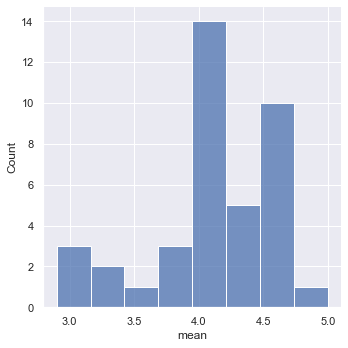

In [17]:
top_ratting = df_pizza[['res_name', 'res_ratting', 'res_reviews']].groupby('res_name').agg(['mean'])['res_ratting']['mean'].sort_values(ascending=False)
sns.displot(top_ratting)

### get the best sandawitch in pizza restaurant

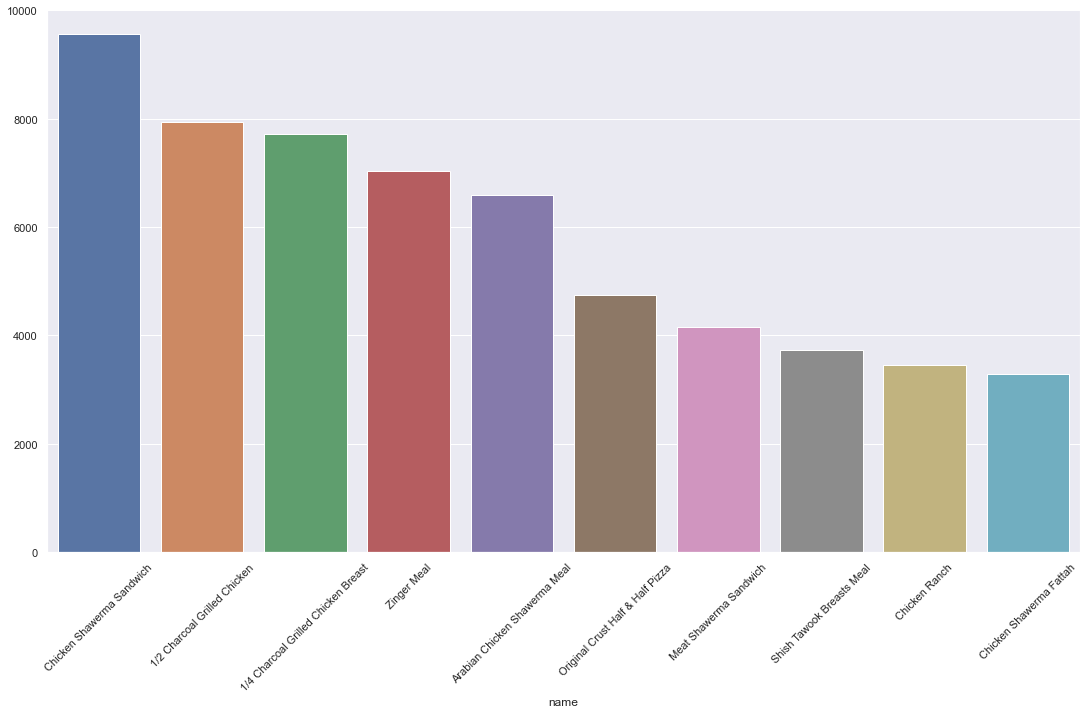

In [19]:
best_sand = df_pizza[['likes', 'name']].groupby('name').agg(['mean'])['likes']['mean'].sort_values(ascending=False)[:10]
ax = sns.barplot(x=best_sand.index, y=best_sand.values)
ax.set_xticklabels(labels=best_sand.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(18.5, 10, forward=True)

### get top rating pizza restaurants

In [21]:
best_res = df_pizza[['res_ratting', 'res_reviews', 'res_name']].groupby('res_name').agg(['mean'])['res_ratting']['mean'].sort_values(ascending=False)[:10]
best_res

res_name
Tree Top               5.0
Diet House             4.7
Il Mulino              4.7
TBS The Bakery Shop    4.6
Best Way               4.6
Ibn AlSham             4.5
Papa John's Pizza      4.5
Pizza Master           4.5
Domino's Pizza         4.5
Majesty                4.5
Name: mean, dtype: float64

In [22]:
best_rev = df_pizza[['res_ratting', 'res_reviews', 'res_name']].groupby('res_name').agg(['mean'])['res_reviews']['mean'].sort_values(ascending=False)
best_rev

res_name
Ibn AlSham                   65322.000000
Papa John's Pizza            37244.213115
7amza                        11230.000000
Pizza Hut                    10499.732620
TBS The Bakery Shop          10256.989950
Anas Al Demashky              9650.000000
Majesty                       9315.000000
Abo El Ezz El Soury           6316.000000
Domino's Pizza                4890.500000
Bab Sharqy                    4416.000000
Anas Chicken                  4254.000000
Double D's Pizza              4056.000000
My El Qalioby                 4000.000000
Best Way                      2987.000000
Sultan Ayub                   2717.000000
Auntie Anne's                 2179.000000
Pizza Master                  1653.000000
La Pomme Pastries             1608.587169
Il Mulino                     1304.178886
Diet House                    1012.000000
Baladena                       917.000000
Country Hills                  791.000000
Pizza El Sultan                730.000000
Estoda Cheese King       

### get all pizza that best way restaurant offers

In [23]:
df_pizza.loc[ df['res_name'] == 'Best Way' ]

,name,image_url,description,likes,section_title,res_name,res_href,offer,delivery_time,res_ratting,...,fries,shawerma,koshary,sandwiches,grills,grilled-chicken,fried-chicken,pizza,pasta,burgers
32753,Mirinda Apple,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,4,Beverages6,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
32754,7up,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,6,Beverages6,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
32755,Mirinda Orange,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,4,Beverages6,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
32756,Pepsi,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,108,Beverages6,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
32757,Large Mineral Water,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,UNAVAILABLE,5,Beverages6,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32941,Strips,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,"Crispy chicken breasts, tomato, pepper, olives...",449,Top Dishes,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
32942,Chicken Galaxy,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,"Penna pasta, charcoal chicken pieces, onion sl...",537,Top Dishes,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
115718,Sugar,UNAVAILABLE,Sugar and samna,14,Sweet Feteer17,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
115843,Best Way Chicken,https://s3-eu-west-1.amazonaws.com/elmenusv5-s...,"Penna pasta, marinated chicken pieces, mushroo...",242,Pasta20,Best Way,/cairo/best-way-x5on,UNAVAILABLE,60 mins,4.6,...,0,0,0,1,0,0,0,1,1,0
